In [118]:
import numpy as np
import pandas as pd

In [119]:
train_df = pd.read_csv("data\sign_mnist_train.csv")
test_df = pd.read_csv("data\sign_mnist_test.csv")

## Exploration

In [120]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [121]:
train_df.shape

(27455, 785)

Separate out the y variable of the labels in train and test sets. 

In [122]:
y_train = train_df["label"]
X_train = train_df.drop(labels=["label"],axis=1)

y_test = test_df["label"]
X_test = test_df.drop(labels=["label"],axis=1)

y_train.shape,X_train.shape, X_test.shape, y_test.shape

((27455,), (27455, 784), (7172, 784), (7172,))

Check label distributions between train and test sets

c:\Users\Kycool13\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\Kycool13\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Test Label Distribution')]

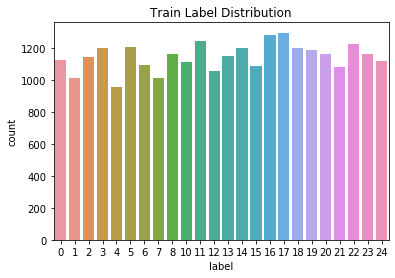

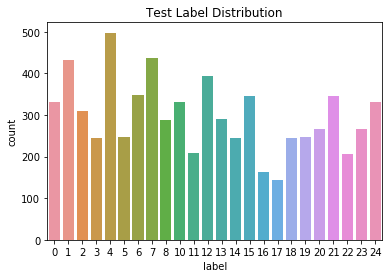

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.countplot(y_train).set(title='Train Label Distribution')
plt.figure()
sns.countplot(y_test).set(title='Test Label Distribution')

View an example image, C shows a label of 2 which indexed at 0 would match. 

Color exists not sure where it comes from as only provided with a 2d grid of pixels. 

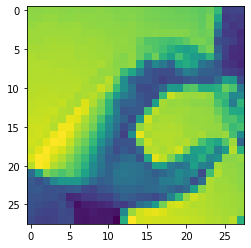

Label:  2


In [125]:
img = X_train.iloc[3].values
reshaped = img.reshape(28,28)
plt.imshow(reshaped)
plt.show()
print("Label: ", y_train.iloc[3])

Check for null or missing values 



In [126]:
X_train.isnull().any().describe() , y_train.isnull().any()

(count       784
 unique        1
 top       False
 freq        784
 dtype: object, False)

### Normalize
Neural networks and activation functions prefer values between 0..1

In [127]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Reshape to 3-d for input of our CNN

In [128]:

X_train = np.array(X_train.iloc[:,:])
X_train = np.array([np.reshape(i, (28,28)) for i in X_train])

X_test = np.array(X_test.iloc[:,:])
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])


num_classes = 26
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]


In [129]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout, BatchNormalization
from tensorflow.keras import Sequential

In [130]:
X_train = X_train.reshape((27455, 28, 28, 1))
X_test = X_test.reshape((7172, 28, 28, 1))


In [131]:
tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale=1./255,
    
                                    rotation_range=10,
                                    zoom_range = .1,
                                    width_shift_range=.1,
                                    height_shift_range=.1,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen.fit(X_train)


In [133]:


model_1 = Sequential([
    Conv2D(75, 3, activation = "relu", strides = 1, padding = 'same', input_shape =(28,28,1)),
    BatchNormalization(),
    MaxPool2D( strides = 2, padding = 'same'),
    Conv2D(50, 3, activation = "relu",  strides = 1, padding = 'same'),
    Dropout(.5),
    BatchNormalization(),
    MaxPool2D( strides = 2, padding = 'same'),
    Conv2D(25, 3, activation = "relu",  strides = 1, padding = 'same'),
    BatchNormalization(),
    MaxPool2D( strides = 2, padding = 'same'),
    Flatten(),
    Dense(512, activation = "relu"),
    Dropout(.5),
    Dense(26, activation = "softmax")
])



model_1.compile(loss="categorical_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

model_1.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_27 (Batc (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_18 (Dropout)         (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 7, 7, 50)        

In [135]:
#from keras.callbacks import ReduceLROnPlateau
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)
hist_2 = model_1.fit(train_datagen.flow(X_train, y_train), epochs=10, validation_data=(X_test, y_test)  )

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 858 steps, validate on 7172 samples
Epoch 1/10
858/858 [==============================] - 184s 214ms/step - loss: 0.1682 - accuracy: 0.9433 - val_loss: 775.4426 - val_accuracy: 0.1517
Epoch 2/10
858/858 [==============================] - 183s 214ms/step - loss: 0.1492 - accuracy: 0.9494 - val_loss: 992.3333 - val_accuracy: 0.2151
Epoch 3/10
858/858 [==============================] - 184s 215ms/step - loss: 0.1357 - accuracy: 0.9541 - val_loss: 1222.4274 - val_accuracy: 0.1251
Epoch 4/10
858/858 [==============================] - 184s 215ms/step - loss: 0.1300 - accuracy: 0.9572 - val_loss: 611.5548 - val_accuracy: 0.3113
Epoch 5/10
858/858 [==============================] - 185s 215ms/step - loss: 0.1168 - accuracy: 0.9618 - val_loss: 1164.1973 - val_accuracy: 0.1790
Epoch 6/10
858/858 [==============================] - 184s 215ms/step - loss: 0.1002 - accuracy: 0.9658 - val_loss: 482.4513 - val_accuracy: 0.3607
Epoch 7/10
858/858 [==============================] - 183s 214ms

In [ ]:
print("Accuracy of the model is - " , model_1.evaluate(X_test,y_test)[1]*100 , "%")

7172/7172 [==============================] - 11s 2ms/sample - loss: 308.0757 - accuracy: 0.3310
Accuracy of the model is -  33.10094773769379 %


In [ ]:
model_1.save('kaggle_cnn_1.h5')

In [ ]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

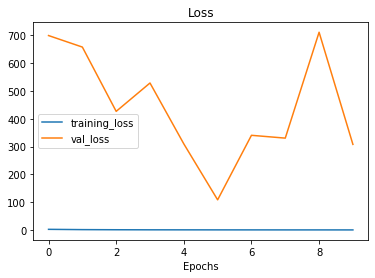

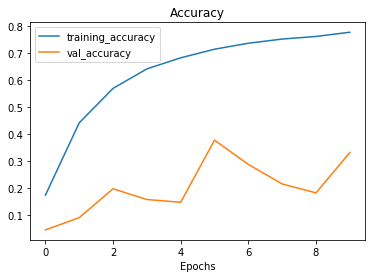

In [ ]:
plot_loss_curves(hist_2)

In [ ]:
from sklearn.metrics import classification_report
predictions = model_1.predict_classes(X_test)
y = test_df["label"]

classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y, predictions, target_names = classes))

In [ ]:
correct = np.nonzero(predictions == y)[0]
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.imshow(X_test[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y[c]))
    plt.tight_layout()
    i += 1